# **Project- Exploratory data analysis of Phonepe**

In [32]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")

# **Step 1: Dataset Loading**

In [5]:
#load the dataset
df = pd.read_csv("/content/phonepe_state_master.csv")

In [6]:
#display first 5 rows of the dataset
df.head()

,states,year,quarter,trans_type,trans_counts,amount,brand,user_counts,percentage,level
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Xiaomi,1665.0,0.247033,state_aggregated
1,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Samsung,1445.0,0.214392,state_aggregated
2,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Vivo,982.0,0.145697,state_aggregated
3,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Oppo,501.0,0.074332,state_aggregated
4,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,OnePlus,332.0,0.049258,state_aggregated


In [7]:
#display last 5 rows of the dataset
df.tail()

,states,year,quarter,trans_type,trans_counts,amount,brand,user_counts,percentage,level
34129,west-bengal,2022,4,Peer-to-peer payments,184380244,6.202222e+11,NaN,NaN,NaN,state_aggregated
34130,west-bengal,2022,4,Merchant payments,171667404,1.408077e+11,NaN,NaN,NaN,state_aggregated
34131,west-bengal,2022,4,Recharge & bill payments,48921147,2.602663e+10,NaN,NaN,NaN,state_aggregated
34132,west-bengal,2022,4,Financial Services,268388,2.611229e+08,NaN,NaN,NaN,state_aggregated
34133,west-bengal,2022,4,Others,610414,4.579379e+08,NaN,NaN,NaN,state_aggregated


In [9]:
#shape of the dataset
df.shape

(34134, 10)

In [10]:
#check the columns in the dataset
df.columns

Index(['states', 'year', 'quarter', 'trans_type', 'trans_counts', 'amount',
       'brand', 'user_counts', 'percentage', 'level'],
      dtype='object')

In [11]:
#check the information about non-null, datatypes and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34134 entries, 0 to 34133
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   states        34134 non-null  object 
 1   year          34134 non-null  int64  
 2   quarter       34134 non-null  int64  
 3   trans_type    34134 non-null  object 
 4   trans_counts  34134 non-null  int64  
 5   amount        34134 non-null  float64
 6   brand         33594 non-null  object 
 7   user_counts   33594 non-null  float64
 8   percentage    33594 non-null  float64
 9   level         34134 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.6+ MB


# **Step 2: Data Cleaning and Preprocessing**

In [12]:
#Identify missing values
df.isnull().sum()

,0
states,0
year,0
quarter,0
trans_type,0
trans_counts,0
amount,0
brand,540
user_counts,540
percentage,540
level,0


In [13]:
#Handle categorical column
df['brand'] = df['brand'].fillna("Unknown")

In [14]:
#Handle numerical columns
df["user_counts"] = df["user_counts"].fillna(df["user_counts"].median())
df["percentage"]  = df["percentage"].fillna(df["percentage"].median())

In [15]:
#Final check missing values
df.isnull().sum()

,0
states,0
year,0
quarter,0
trans_type,0
trans_counts,0
amount,0
brand,0
user_counts,0
percentage,0
level,0


In [16]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

**Insights**- As we can observe that there are no duplicates which is good and ensures that data quality has been maintained

In [17]:
#Checking datatypes
df.dtypes


,0
states,object
year,int64
quarter,int64
trans_type,object
trans_counts,int64
amount,float64
brand,object
user_counts,float64
percentage,float64
level,object


**Insights**- All numerical cols like user_counts, percentage and even year, quarter are having int and float data types. There is no requirement henceforth to convert their dtypes.

In [20]:
#Standardize cols to title case
df.columns = df.columns.str.title().str.replace(' ', '_')

In [21]:
#quick check
df.head()

,States,Year,Quarter,Trans_Type,Trans_Counts,Amount,Brand,User_Counts,Percentage,Level
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Xiaomi,1665.0,0.247033,state_aggregated
1,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Samsung,1445.0,0.214392,state_aggregated
2,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Vivo,982.0,0.145697,state_aggregated
3,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,Oppo,501.0,0.074332,state_aggregated
4,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06,OnePlus,332.0,0.049258,state_aggregated


# **Step 3: Exploratory Data Analysis (EDA)**

In [33]:
#Summary statistics using describe()
df.describe()

,Year,Quarter,Trans_Counts,Amount,User_Counts,Percentage
count,"34,134.00","34,134.00","34,134.00","34,134.00","34,134.00","34,134.00"
mean,"2,019.69",2.42,"13,824,335.35","24,175,255,898.79","508,222.15",0.09
std,1.26,1.14,"47,121,936.07","103,153,722,654.58","1,075,270.74",0.08
min,"2,018.00",1.00,2.00,34.40,10.00,0.01
25%,"2,019.00",1.00,"35,467.00","23,006,751.80","10,033.25",0.02
50%,"2,020.00",2.00,"323,887.00","246,679,805.00","85,256.00",0.06
75%,"2,021.00",3.00,"5,142,124.00","4,205,862,516.78","447,713.00",0.14
max,"2,022.00",4.00,"1,025,666,187.00","2,393,380,395,296.85","11,340,940.00",0.48


In [27]:
#Value counts for categorical columns
df['Brand'].value_counts()

,count
Brand,
Xiaomi,3054
Samsung,3054
Vivo,3054
Oppo,3054
Realme,3054
Others,3054
Motorola,2871
Apple,2739
Huawei,2529


In [34]:
#Group-by analysis (e.g., average, total, count)
# Group by 'Year' to see the trend in Average Transaction Amount
avg_amount_by_year = df.groupby('Year')['Amount'].mean()
print("Average Transaction Amount by Year:")
print(avg_amount_by_year)

Average Transaction Amount by Year:
Year
2018    2,260,508,908.65
2019    8,754,097,814.77
2020   20,363,229,454.88
2021   48,053,749,565.51
2022   78,040,729,248.50
Name: Amount, dtype: float64


In [35]:
#Identify top or bottom performing categories
top_states = df.groupby('States')['Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 States by Total Transaction Amount:")
print(top_states)

Top 5 States by Total Transaction Amount:
States
telangana        105,392,237,992,145.53
maharashtra      100,841,435,770,867.73
karnataka         98,241,846,707,514.12
andhra-pradesh    84,535,704,391,498.88
rajasthan         61,731,162,547,144.35
Name: Amount, dtype: float64


In [37]:
#Correlation analysis between numerical columns
correlation_matrix = df[['User_Counts', 'Percentage']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             User_Counts  Percentage
User_Counts         1.00        0.42
Percentage          0.42        1.00


# **Step 4: Data Visualization**

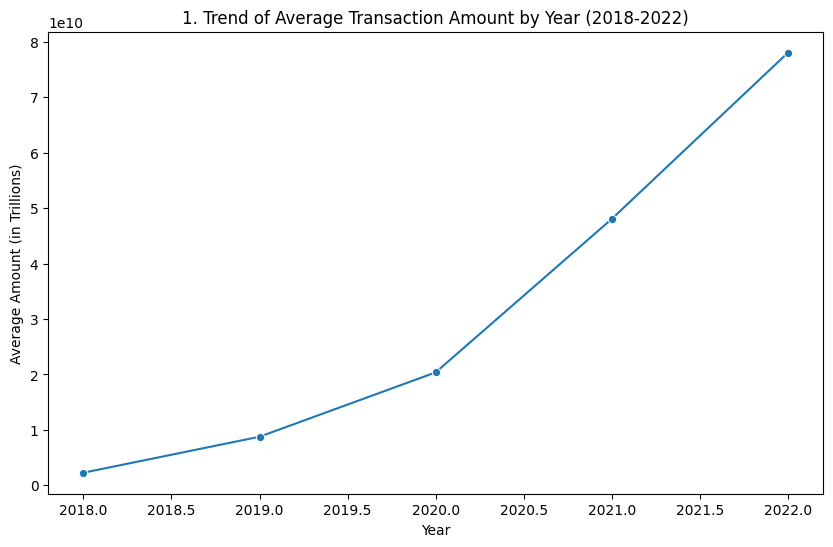

In [39]:
# --- 1. Yearly Trend of Average Transaction Amount ---
plt.figure(figsize=(10, 6))
avg_amount_by_year_df = avg_amount_by_year.reset_index()
sns.lineplot(data=avg_amount_by_year_df, x='Year', y='Amount', marker='o')
plt.title('1. Trend of Average Transaction Amount by Year (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Amount (in Trillions)')
plt.show()

**Findings-** Average transaction value increased exponentially from 2018 to 2022, signifying massive platform adoption and growth in payment size.



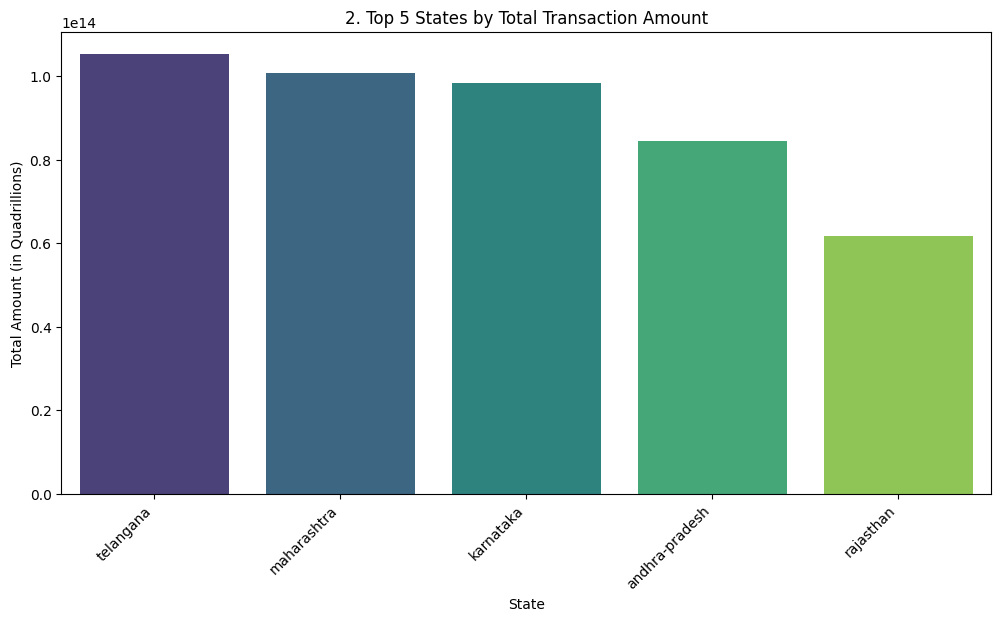

In [41]:
# --- 2. Top 5 States by Total Transaction Amount ---
plt.figure(figsize=(12, 6))
top_states_df = top_states.reset_index()
sns.barplot(data=top_states_df, x='States', y='Amount', palette='viridis')
plt.title('2. Top 5 States by Total Transaction Amount')
plt.xlabel('State')
plt.ylabel('Total Amount (in Quadrillions)')
plt.xticks(rotation=45, ha='right')
plt.show()

**Findings-** Telangana has the highest total transaction amount, the top 3 Telangana, Maharashtra, Karnataka) are very close, and Rajasthan is the lowest among the five

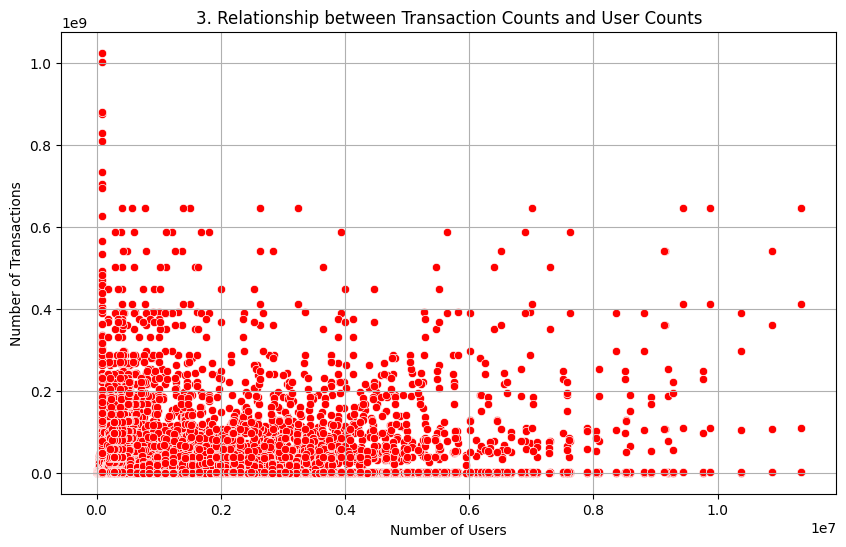

In [48]:
# --- 3. Relationship between Transaction Counts and User Counts ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='User_Counts', y='Trans_Counts', color='red')
plt.title('3. Relationship between Transaction Counts and User Counts')
plt.xlabel('Number of Users')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

**Findings**- The scatter plot shows a weak positive relationship: higher user counts generally correspond to more transactions, but with large variability. Most observations are clustered at low user counts, with a few outliers showing very high transactions even at low users.

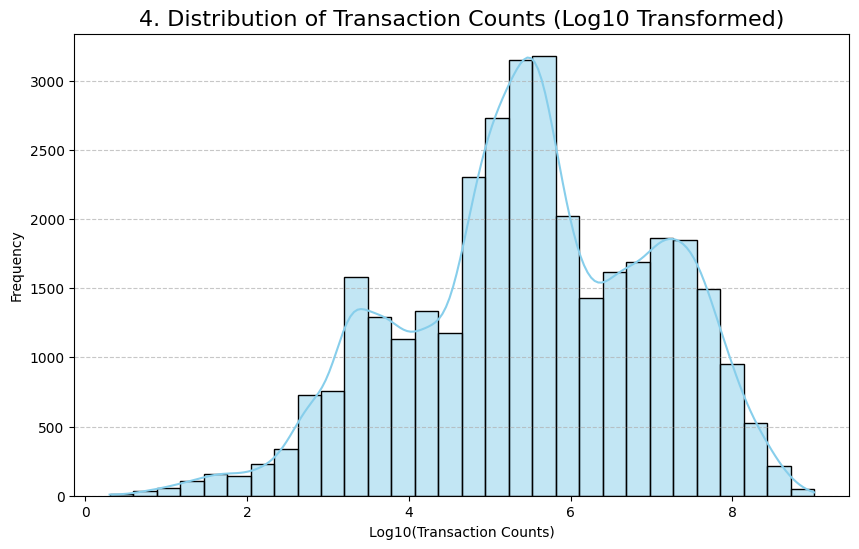

In [52]:
# --- 4. Distribution of transaction counts ---
plt.figure(figsize=(10, 6))
df['log_trans_counts'] = np.log10(df['Trans_Counts']) # Create the log-transformed column
sns.histplot(df['log_trans_counts'], bins=30, kde=True, color='skyblue')
plt.title('4. Distribution of Transaction Counts (Log10 Transformed)', fontsize=16)
plt.xlabel('Log10(Transaction Counts)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Findings**- The log10-transformed transaction counts are widely spread and show a multi-modal pattern, with a major peak around ~5.5–6 and a secondary concentration around ~7–7.5, indicating distinct volume clusters (mid vs high).

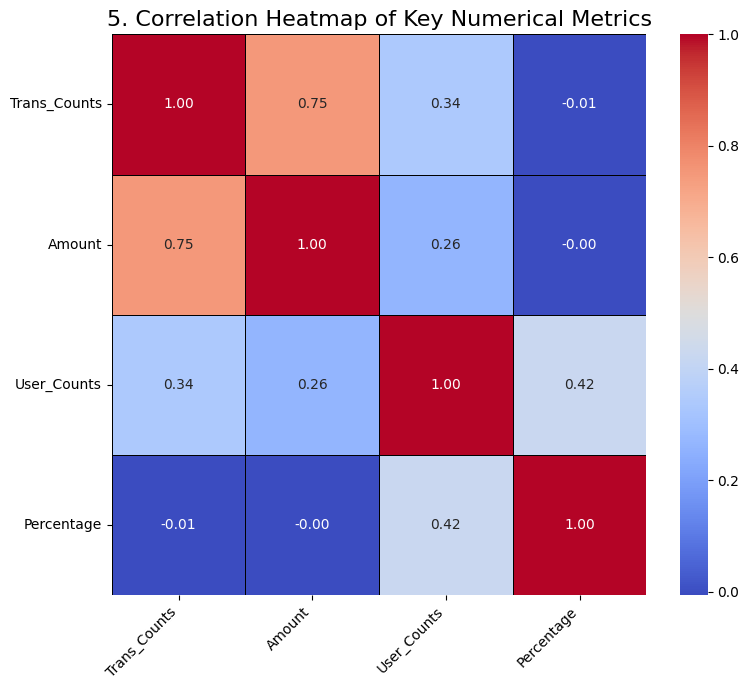

In [57]:
# --- 5. Correlation heatmap between numerical features ---
numerical_cols = ['Trans_Counts', 'Amount', 'User_Counts', 'Percentage']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm', # Use a diverging palette
            cbar=True,
            linewidths=.5,
            linecolor='black')
plt.title('5. Correlation Heatmap of Key Numerical Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Findings-** Transaction counts and amount are strongly positively correlated (r = 0.75), while user counts have only moderate correlation with transactions (0.34) and amount (0.26). Percentage is mostly unrelated to transactions/amount (~0) but has a moderate link with user counts (0.42).

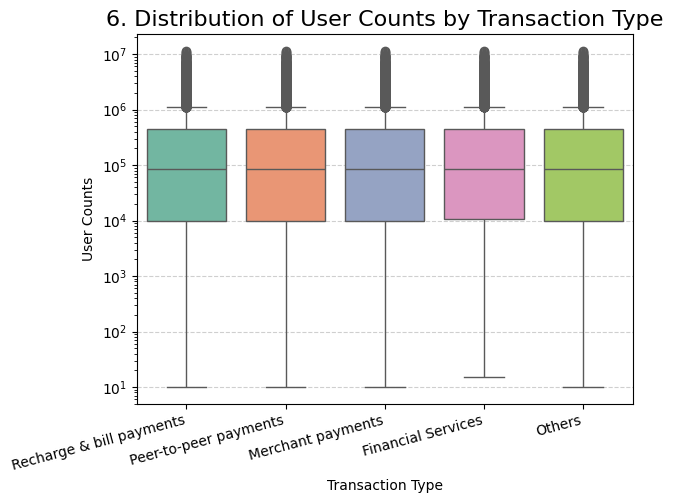

In [63]:
# --- 6. Distribution of user counts by transaction type ---
sns.boxplot(data=df, x='Trans_Type', y='User_Counts', palette='Set2')
plt.yscale('log')
plt.title('6. Distribution of User Counts by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type')
plt.ylabel('User Counts')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Findings**- User counts are similar across all transaction types (median roughly around 10⁵ on the log scale) with wide spread and many high-user outliers, indicating a few categories/regions drive very large user volumes in every type.

# **Insights-**

1. Average transaction amount is rising sharply year over year (2018→2022), with the biggest jump after 2020.

**Why it matters:** This signals rapid growth in digital payment value—useful for forecasting revenue potential, infrastructure needs, and market expansion strategy.

2. A few states contribute disproportionately to total transaction amount (Telangana highest, followed by Maharashtra and Karnataka; Rajasthan lowest among the top 5).

**Why it matters:** Prioritizing these states for partnerships, merchant onboarding, and reliability improvements can deliver outsized impact.

3. Transaction counts and total amount are strongly linked (correlation ~0.75).

**Why it matters:** Driving more transaction volume (frequency) is likely to directly increase overall value—good for setting growth KPIs around repeat usage.

4. User counts relate only moderately to transactions/amount (transactions vs users ~0.34; amount vs users ~0.26).

**Why it matters:** Growth isn’t just about acquiring users—activation and usage intensity (transactions per user) are key levers.

5. Scatter plot shows a weak-to-moderate upward trend with high dispersion and notable outliers (some areas show very high transactions even with lower users).

**Why it matters:** Indicates “high-activity pockets” (power users/merchant-heavy regions). Studying these can reveal best practices to replicate elsewhere.

6. Log-transformed transaction counts are wide and multi-peaked (clusters around mid and high volumes).

**Why it matters:** The ecosystem isn’t uniform—there are distinct segments (low/mid/high activity). Segment-specific strategies (e.g., nurture low-volume regions vs scale high-volume ones) will work better than one-size-fits-all.

7. User distribution across transaction types is broadly similar, with many high-user outliers in every type; transaction type split is nearly even (~20% each).

**Why it matters:** No single category dominates—growth can come from multiple categories, and each category has “whale” regions/users worth targeting with tailored campaigns.